## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0   4.376438  1231.576347  0.775264   9.702018  1.445356
1  21.522941  1077.742188  0.020983   2.984241  0.886247
2  60.287290   143.300118  0.535265   9.540410  0.942589
3  43.179507   194.291052  0.484656  10.819886  1.122579
4  85.740795   195.140486  0.627002   5.083373  1.054012


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0369131	total: 58ms	remaining: 57.9s
1:	learn: 1.0314225	total: 58.4ms	remaining: 29.1s
2:	learn: 1.0238647	total: 59ms	remaining: 19.6s
3:	learn: 1.0166976	total: 59.5ms	remaining: 14.8s
4:	learn: 1.0107681	total: 60.2ms	remaining: 12s
5:	learn: 1.0051186	total: 60.6ms	remaining: 10s
6:	learn: 0.9973268	total: 61.2ms	remaining: 8.68s
7:	learn: 0.9892449	total: 61.6ms	remaining: 7.64s
8:	learn: 0.9815291	total: 62ms	remaining: 6.83s
9:	learn: 0.9751299	total: 62.5ms	remaining: 6.18s
10:	learn: 0.9677131	total: 63.1ms	remaining: 5.67s
11:	learn: 0.9593183	total: 63.5ms	remaining: 5.23s
12:	learn: 0.9532462	total: 64.1ms	remaining: 4.86s
13:	learn: 0.9468113	total: 64.5ms	remaining: 4.54s
14:	learn: 0.9390186	total: 64.9ms	remaining: 4.26s
15:	learn: 0.9327804	total: 65.4ms	remaining: 4.02s
16:	learn: 0.9261016	total: 65.9ms	remaining: 3.81s
17:	learn: 0.9190352	total: 66.3ms	remaining: 3.62s
18:	learn: 0.9142483	total: 66.8ms	remaining: 3.45s
19

118:	learn: 0.5115479	total: 108ms	remaining: 800ms
119:	learn: 0.5084730	total: 109ms	remaining: 797ms
120:	learn: 0.5063855	total: 109ms	remaining: 793ms
121:	learn: 0.5046172	total: 109ms	remaining: 788ms
122:	learn: 0.5017732	total: 110ms	remaining: 784ms
123:	learn: 0.4994252	total: 110ms	remaining: 780ms
124:	learn: 0.4975521	total: 111ms	remaining: 776ms
125:	learn: 0.4954091	total: 111ms	remaining: 772ms
126:	learn: 0.4927714	total: 112ms	remaining: 768ms
127:	learn: 0.4915329	total: 112ms	remaining: 763ms
128:	learn: 0.4893915	total: 113ms	remaining: 760ms
129:	learn: 0.4871297	total: 113ms	remaining: 755ms
130:	learn: 0.4853087	total: 113ms	remaining: 752ms
131:	learn: 0.4826933	total: 114ms	remaining: 748ms
132:	learn: 0.4806043	total: 114ms	remaining: 744ms
133:	learn: 0.4785482	total: 115ms	remaining: 740ms
134:	learn: 0.4773726	total: 115ms	remaining: 737ms
135:	learn: 0.4757153	total: 115ms	remaining: 733ms
136:	learn: 0.4733172	total: 116ms	remaining: 730ms
137:	learn: 

294:	learn: 0.2807845	total: 185ms	remaining: 443ms
295:	learn: 0.2796852	total: 186ms	remaining: 442ms
296:	learn: 0.2790529	total: 186ms	remaining: 441ms
297:	learn: 0.2781846	total: 187ms	remaining: 440ms
298:	learn: 0.2768676	total: 187ms	remaining: 438ms
299:	learn: 0.2764384	total: 187ms	remaining: 437ms
300:	learn: 0.2751011	total: 188ms	remaining: 436ms
301:	learn: 0.2745809	total: 188ms	remaining: 435ms
302:	learn: 0.2737313	total: 189ms	remaining: 434ms
303:	learn: 0.2734726	total: 189ms	remaining: 433ms
304:	learn: 0.2728349	total: 189ms	remaining: 431ms
305:	learn: 0.2717873	total: 190ms	remaining: 430ms
306:	learn: 0.2715423	total: 190ms	remaining: 429ms
307:	learn: 0.2708470	total: 191ms	remaining: 428ms
308:	learn: 0.2698181	total: 191ms	remaining: 427ms
309:	learn: 0.2692617	total: 191ms	remaining: 426ms
310:	learn: 0.2690080	total: 192ms	remaining: 425ms
311:	learn: 0.2687679	total: 192ms	remaining: 424ms
312:	learn: 0.2679902	total: 193ms	remaining: 423ms
313:	learn: 

538:	learn: 0.1333059	total: 290ms	remaining: 248ms
539:	learn: 0.1327501	total: 290ms	remaining: 247ms
540:	learn: 0.1323121	total: 291ms	remaining: 247ms
541:	learn: 0.1318854	total: 291ms	remaining: 246ms
542:	learn: 0.1312220	total: 292ms	remaining: 245ms
543:	learn: 0.1307058	total: 292ms	remaining: 245ms
544:	learn: 0.1305113	total: 292ms	remaining: 244ms
545:	learn: 0.1300879	total: 293ms	remaining: 244ms
546:	learn: 0.1299379	total: 293ms	remaining: 243ms
547:	learn: 0.1292977	total: 294ms	remaining: 242ms
548:	learn: 0.1291044	total: 294ms	remaining: 242ms
549:	learn: 0.1285286	total: 295ms	remaining: 241ms
550:	learn: 0.1280127	total: 295ms	remaining: 241ms
551:	learn: 0.1278220	total: 296ms	remaining: 240ms
552:	learn: 0.1273167	total: 296ms	remaining: 239ms
553:	learn: 0.1271284	total: 297ms	remaining: 239ms
554:	learn: 0.1265815	total: 297ms	remaining: 238ms
555:	learn: 0.1263963	total: 298ms	remaining: 238ms
556:	learn: 0.1259081	total: 298ms	remaining: 237ms
557:	learn: 

715:	learn: 0.0893638	total: 367ms	remaining: 145ms
716:	learn: 0.0892669	total: 367ms	remaining: 145ms
717:	learn: 0.0890258	total: 368ms	remaining: 144ms
718:	learn: 0.0889317	total: 368ms	remaining: 144ms
719:	learn: 0.0888915	total: 368ms	remaining: 143ms
720:	learn: 0.0888002	total: 369ms	remaining: 143ms
721:	learn: 0.0887440	total: 369ms	remaining: 142ms
722:	learn: 0.0886548	total: 370ms	remaining: 142ms
723:	learn: 0.0886157	total: 370ms	remaining: 141ms
724:	learn: 0.0885276	total: 371ms	remaining: 141ms
725:	learn: 0.0882851	total: 371ms	remaining: 140ms
726:	learn: 0.0881973	total: 371ms	remaining: 139ms
727:	learn: 0.0881590	total: 372ms	remaining: 139ms
728:	learn: 0.0880729	total: 372ms	remaining: 138ms
729:	learn: 0.0880353	total: 373ms	remaining: 138ms
730:	learn: 0.0879503	total: 373ms	remaining: 137ms
731:	learn: 0.0879132	total: 374ms	remaining: 137ms
732:	learn: 0.0878292	total: 374ms	remaining: 136ms
733:	learn: 0.0877774	total: 375ms	remaining: 136ms
734:	learn: 

929:	learn: 0.0587848	total: 469ms	remaining: 35.3ms
930:	learn: 0.0587149	total: 470ms	remaining: 34.8ms
931:	learn: 0.0586459	total: 470ms	remaining: 34.3ms
932:	learn: 0.0585838	total: 471ms	remaining: 33.8ms
933:	learn: 0.0584732	total: 471ms	remaining: 33.3ms
934:	learn: 0.0583519	total: 471ms	remaining: 32.8ms
935:	learn: 0.0582908	total: 472ms	remaining: 32.3ms
936:	learn: 0.0582400	total: 472ms	remaining: 31.8ms
937:	learn: 0.0581796	total: 473ms	remaining: 31.2ms
938:	learn: 0.0581098	total: 473ms	remaining: 30.7ms
939:	learn: 0.0579379	total: 474ms	remaining: 30.2ms
940:	learn: 0.0578740	total: 474ms	remaining: 29.7ms
941:	learn: 0.0578067	total: 474ms	remaining: 29.2ms
942:	learn: 0.0577473	total: 475ms	remaining: 28.7ms
943:	learn: 0.0575774	total: 475ms	remaining: 28.2ms
944:	learn: 0.0575274	total: 476ms	remaining: 27.7ms
945:	learn: 0.0574589	total: 476ms	remaining: 27.2ms
946:	learn: 0.0573914	total: 476ms	remaining: 26.7ms
947:	learn: 0.0573258	total: 477ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

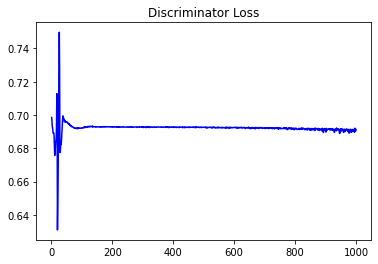

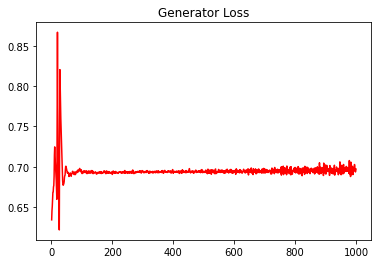

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.19450487653534093


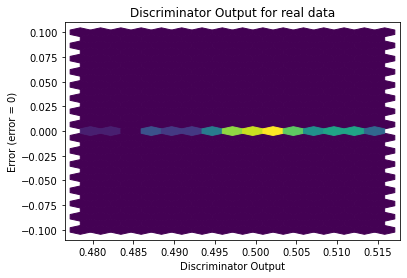

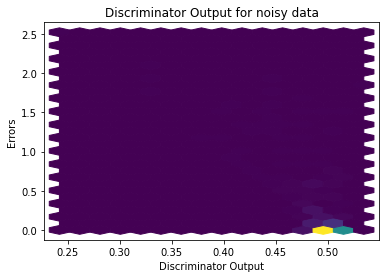

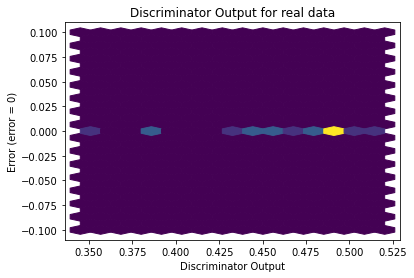

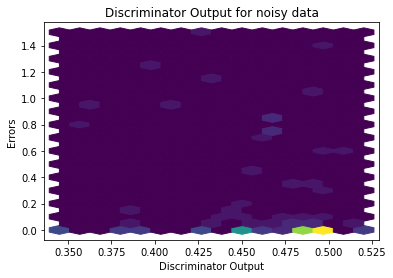

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


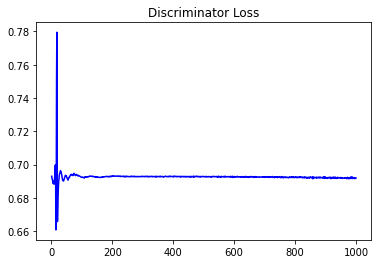

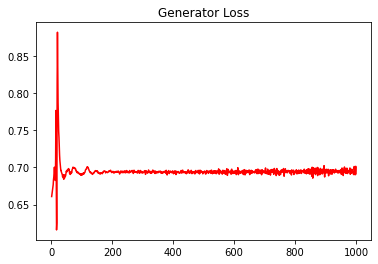

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.18183762615810456


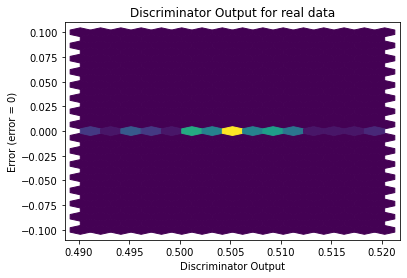

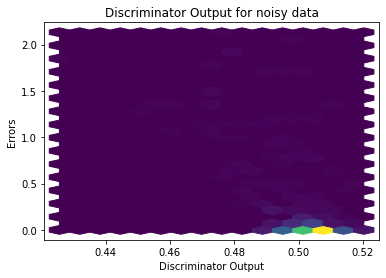

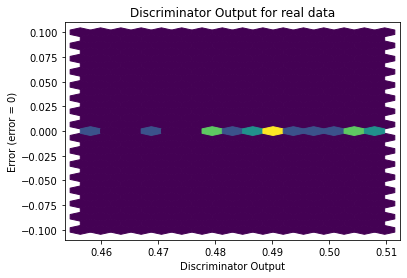

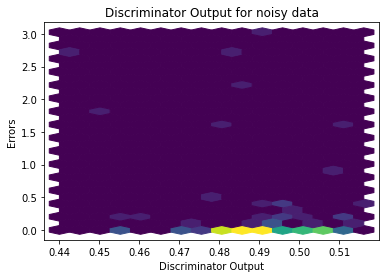

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4638]], requires_grad=True)
